In [1]:
import pandas as pd               
import numpy as np               
import matplotlib.pyplot as plt   
import seaborn as sns             

%matplotlib inline

In [2]:
qw = pd.read_csv ('C:/Users/User/Desktop/Data/Vedeneev_Stepan.csv')
qw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
qw.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [4]:
#Есть пропуски, посмотри их процент

In [5]:
qw.isnull().sum()/len(qw)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [6]:
#В датасете всего 2 столбца, в которых процент пропусков больше 50.
#Это BuildingArea(60,5%) и YearBuilt(55,3%). Значит выкидываем их из датасета
#Так же я немного упрощу себе задачу и уберу тестовые переменные, так как у нас есть Postcode и широта я буду брать их его
#вместо места/региона/пригорода и т.д.

In [7]:
qw.drop(['Address'], axis =1,inplace=True)
qw.drop(['YearBuilt'], axis = 1,inplace=True)
qw.drop(['BuildingArea'], axis = 1,inplace=True)
qw.drop(['SellerG'], axis = 1,inplace=True)
qw.drop(['Method'], axis = 1,inplace=True)
qw.drop(['CouncilArea'], axis = 1,inplace=True)
qw.drop(['Regionname'], axis = 1,inplace=True)
qw.drop(['Type'], axis = 1,inplace=True)
qw.drop(['Suburb'], axis = 1,inplace=True)
qw.head()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
0,2,NaN,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,-37.8014,144.9958,4019.0
1,2,1480000.0,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0
2,2,1035000.0,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0
3,3,NaN,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,-37.8114,145.0116,4019.0
4,3,1465000.0,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0


In [8]:
#Проверим, убраны ли ненужные столбцы:

In [9]:
qw.columns

Index(['Rooms', 'Price', 'Date', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

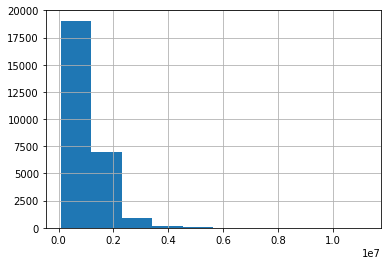

In [10]:
qw.Price.hist();

In [11]:
#Все отлично, продолжим:
#В переменной Price много пропусков (более 20%), так что заполним их средним значением
#То же самое и с отсальными значемиями, но иногда используем медиану

In [12]:
qw['Price'].fillna(qw['Price'].median(), inplace = True)

In [13]:
#Убираем хвост:

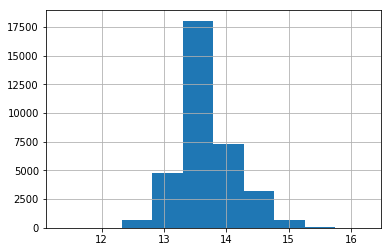

In [14]:
qw['Price'] = np.log(qw['Price'])
qw.Price.hist();

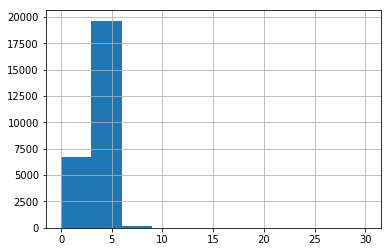

In [15]:
qw.Bedroom2.hist();

In [16]:
qw['Bedroom2'].fillna(qw['Bedroom2'].median(), inplace = True)

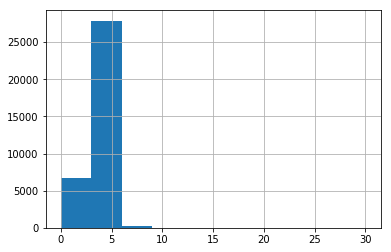

In [17]:
qw.Bedroom2.hist();

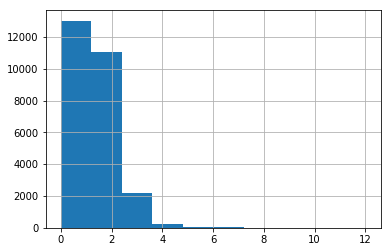

In [18]:
qw.Bathroom.hist();

In [19]:
qw['Bathroom'].fillna(qw['Bathroom'].mean(), inplace = True)

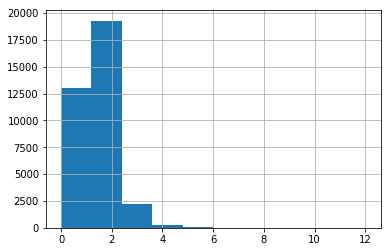

In [20]:
qw.Bathroom.hist();

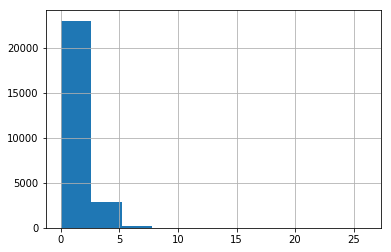

In [21]:
qw.Car.hist();

In [22]:
qw['Car'].fillna(qw['Car'].median(), inplace = True)

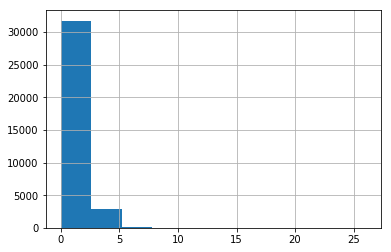

In [23]:
qw.Car.hist();

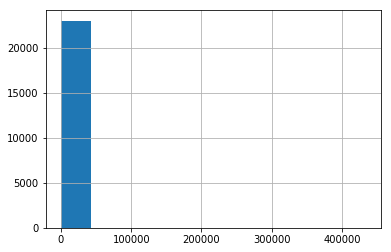

In [24]:
qw.Landsize.hist();

In [25]:
qw['Landsize'].fillna(qw['Landsize'].median(), inplace = True)

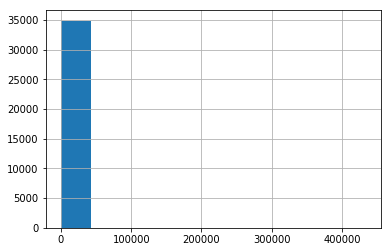

In [26]:
qw.Landsize.hist();

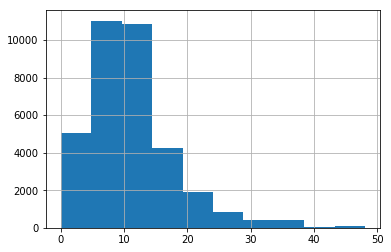

In [27]:
qw.Distance.hist();

In [28]:
qw['Distance'].fillna(qw['Distance'].mean(), inplace = True)

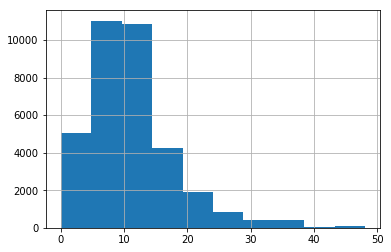

In [29]:
qw.Distance.hist();

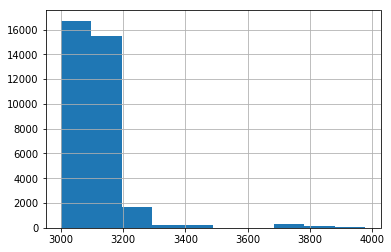

In [30]:
qw.Postcode.hist();

In [31]:
qw['Postcode'].fillna(qw['Postcode'].mean(), inplace = True)

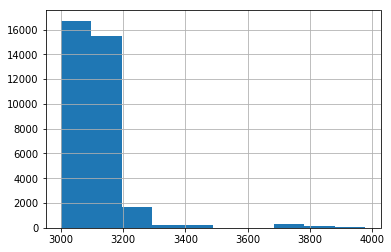

In [32]:
qw.Postcode.hist();

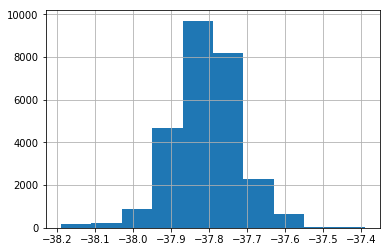

In [33]:
qw.Lattitude.hist();

In [34]:
qw['Lattitude'].fillna(qw['Lattitude'].mean(), inplace = True)

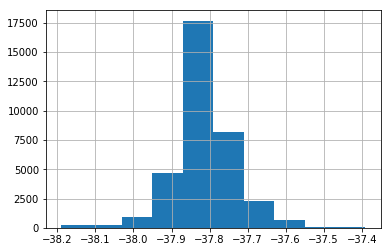

In [35]:
qw.Lattitude.hist();

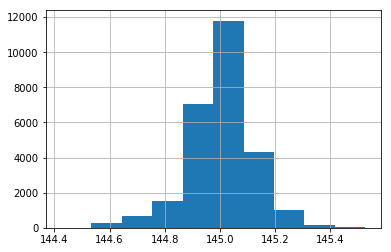

In [36]:
qw.Longtitude.hist();

In [37]:
qw['Longtitude'].fillna(qw['Longtitude'].mean(), inplace = True)

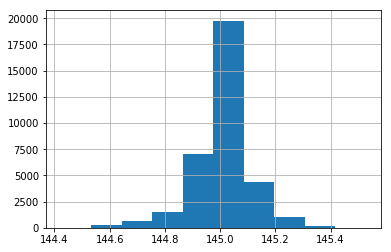

In [38]:
qw.Longtitude.hist();

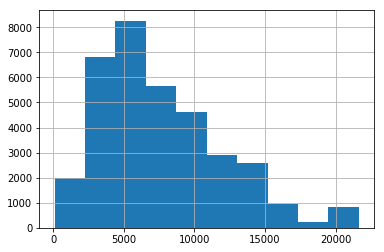

In [39]:
qw.Propertycount.hist();

In [40]:
qw['Propertycount'].fillna(qw['Propertycount'].mean(), inplace = True)

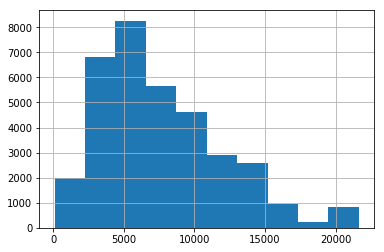

In [41]:
qw.Propertycount.hist();

In [42]:
qw['Date'] = pd.to_datetime(qw['Date'])

In [43]:
qw["month"] = qw.Date.apply(lambda row: row.month)

In [44]:
qw["year"] = qw.Date.apply(lambda row: row.year)

In [45]:
qw = qw.drop('Date', axis=1)

In [46]:
len(qw['month'].unique())

12

In [47]:
len(qw['year'].unique())

3

In [48]:
qw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 13 columns):
Rooms            34857 non-null int64
Price            34857 non-null float64
Distance         34857 non-null float64
Postcode         34857 non-null float64
Bedroom2         34857 non-null float64
Bathroom         34857 non-null float64
Car              34857 non-null float64
Landsize         34857 non-null float64
Lattitude        34857 non-null float64
Longtitude       34857 non-null float64
Propertycount    34857 non-null float64
month            34857 non-null int64
year             34857 non-null int64
dtypes: float64(10), int64(3)
memory usage: 3.5 MB


In [49]:
qw.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,month,year
0,2,13.676248,2.5,3067.0,2.0,1.0,1.0,126.0,-37.8014,144.9958,4019.0,3,2016
1,2,14.207553,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,3,2016
2,2,13.849912,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,4,2016
3,3,13.676248,2.5,3067.0,3.0,2.0,1.0,0.0,-37.8114,145.0116,4019.0,4,2016
4,3,14.197366,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,4,2017


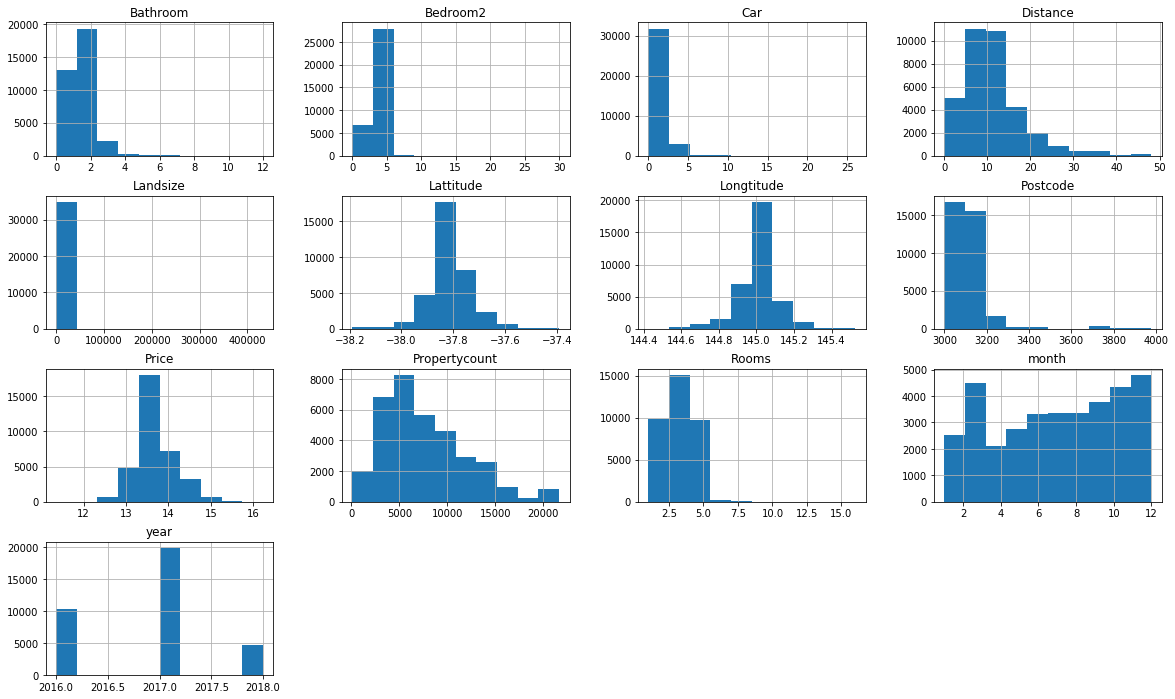

In [50]:
qw.hist(figsize=(20, 12));

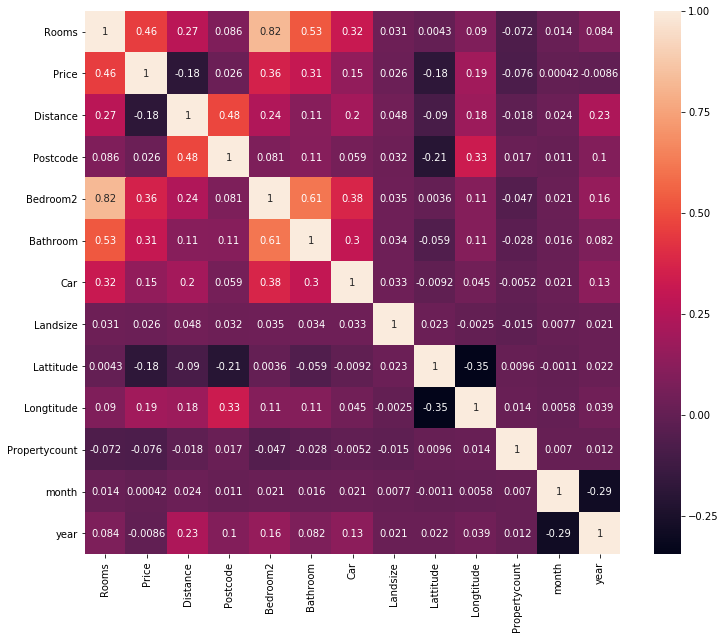

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(qw.corr(), annot=True);

### Комментарий
Отличная предобработка и грамотное заполнение пропусков 

И графики топ :3

In [52]:
# Да, я люблю графики <3

In [53]:
qw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 13 columns):
Rooms            34857 non-null int64
Price            34857 non-null float64
Distance         34857 non-null float64
Postcode         34857 non-null float64
Bedroom2         34857 non-null float64
Bathroom         34857 non-null float64
Car              34857 non-null float64
Landsize         34857 non-null float64
Lattitude        34857 non-null float64
Longtitude       34857 non-null float64
Propertycount    34857 non-null float64
month            34857 non-null int64
year             34857 non-null int64
dtypes: float64(10), int64(3)
memory usage: 3.5 MB


In [54]:
qw['Rooms'] = qw['Rooms'].astype(str)
qw['month'] = qw['month'].astype(str)
qw['year'] = qw['year'].astype(str)

In [55]:
target_var = 'Price'
categor_var = ['Rooms','month','year' ]
contin_var = ['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 
              'Landsize', 'Lattitude', 'Longtitude', 'Propertycount'] 

In [56]:
qw_categor = qw[categor_var]
qw_categor.head()
#Выглядит конечно грустно, всего 3 категориальные переменные...

,Rooms,month,year
0,2,3,2016
1,2,3,2016
2,2,4,2016
3,3,4,2016
4,3,4,2017


In [57]:
len(qw['Rooms'].unique()), len(qw['month'].unique()),len(qw['year'].unique())

(12, 12, 3)

In [58]:
qw_categor = pd.get_dummies(qw[categor_var], dummy_na=False, drop_first=True)
qw_categor.head()

,Rooms_10,Rooms_12,Rooms_16,Rooms_2,Rooms_3,Rooms_4,Rooms_5,Rooms_6,Rooms_7,Rooms_8,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,year_2017,year_2018
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [59]:
qw = pd.concat([qw,qw_categor], axis=1)
qw.drop(categor_var, axis=1, inplace=True)
qw.head()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,year_2017,year_2018
0,13.676248,2.5,3067.0,2.0,1.0,1.0,126.0,-37.8014,144.9958,4019.0,...,0,1,0,0,0,0,0,0,0,0
1,14.207553,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,4019.0,...,0,1,0,0,0,0,0,0,0,0
2,13.849912,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,4019.0,...,0,0,1,0,0,0,0,0,0,0
3,13.676248,2.5,3067.0,3.0,2.0,1.0,0.0,-37.8114,145.0116,4019.0,...,0,0,1,0,0,0,0,0,0,0
4,14.197366,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,4019.0,...,0,0,1,0,0,0,0,0,1,0


In [60]:
# Наконец начнем делить переменные на тренировочные и тестовые

from sklearn.model_selection import train_test_split
qw_train, qw_test = train_test_split(qw, test_size = 0.3)

Price_train = qw_train['Price']
Price_test = qw_test['Price']

X_train = qw_train.drop(['Price'], axis=1)
X_test = qw_test.drop(['Price'], axis=1)

In [61]:
qw_train.shape, qw_train.shape

((24399, 34), (24399, 34))

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(qw_train[['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 
                     'Lattitude', 'Longtitude', 'Propertycount']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
qw_train_scale = scaler.transform(qw_train[['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']])
qw_test_scale = scaler.transform(qw_test[['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']])

In [64]:
qw_train[['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']] = qw_train_scale
qw_test[['Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Propertycount']] = qw_test_scale

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [65]:
print(qw_train.shape) 
print(qw_test.shape)

(24399, 34)
(10458, 34)


In [66]:
qw_train.head()

,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,...,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,year_2017,year_2018
30618,13.815511,0.441437,0.300128,-0.077558,0.001228,2.0,-0.016408,0.001570,0.001697,1.304706,...,0,0,0,0,0,0,0,1,1,0
32787,13.753635,0.030057,0.803897,-0.077558,0.001228,2.0,-0.016408,0.001570,0.001697,-0.903175,...,1,0,0,0,0,0,0,0,0,1
13379,13.676248,0.088826,0.803897,-0.077558,0.001228,2.0,-0.016408,0.001570,0.001697,-0.903175,...,0,0,0,0,0,0,1,0,1,0
30429,13.981025,0.382668,0.657346,-0.077558,0.593327,2.0,-0.016408,-1.664077,0.160058,-0.480005,...,0,0,0,0,0,0,0,1,1,0
17762,13.676248,-1.248160,0.226852,-2.415213,-0.984755,1.0,-0.179965,-0.428238,0.018621,1.647799,...,0,0,0,0,0,0,1,0,1,0


In [67]:
y_train = qw_train.Price 
y_test = qw_test.Price 

X_train = qw_train.drop('Price', axis=1).get_values()
X_test = qw_test.drop('Price', axis=1).get_values()

In [68]:
y_mean = np.mean(y_train)                      

y_pred_naive = np.ones(len(y_test)) * y_mean  
y_pred_naive[:10]

array([13.7119139, 13.7119139, 13.7119139, 13.7119139, 13.7119139,
       13.7119139, 13.7119139, 13.7119139, 13.7119139, 13.7119139])

In [69]:
from sklearn import metrics
metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred_naive))


342411.4995598398

In [70]:
metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred_naive))

362064266874.73975

In [71]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_pred_naive)

2.3934613075558597

In [72]:
metrics.r2_score(y_test, y_pred_naive)

-2.4201138250523613e-05

In [73]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred))))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [74]:
from sklearn.linear_model import LinearRegression

model_regression = LinearRegression()
model_regression.fit(X_train, y_train)
y_pred_regr = model_regression.predict(X_test)

In [75]:
print_metrics(y_test,y_pred_regr)

MAE: 290361.6905340861
RMSE: 492196.3519831448
R2: 0.4299146840874726
MAPE: 1.9584791541604485


In [76]:
#Теперь я хочу рассмотреть значимость каждой переменной для Price:

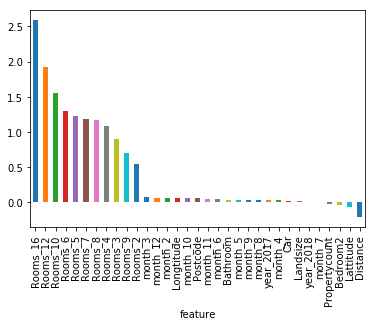

In [77]:
featureImportance = pd.DataFrame({"feature": qw.drop('Price',axis=1).columns, "importance": model_regression.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=78)
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

In [79]:
#Теперь я хочу рассмотреть значимость каждой переменной для Price:

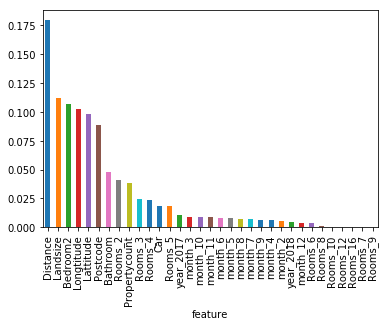

In [80]:
featureImportance = pd.DataFrame({"feature": qw.drop('Price',axis=1).columns, "importance": rf.feature_importances_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [81]:
rf = RandomForestRegressor()
estimators = ('n_estimator')

In [82]:
# Попробую построить Lasso: (самое сложное для меня)

In [83]:
from sklearn.linear_model import Lasso

model_simplelasso = Lasso()
 
model_simplelasso.fit(X_train, y_train)

y_pred_lasso = model_simplelasso.predict(X_test)

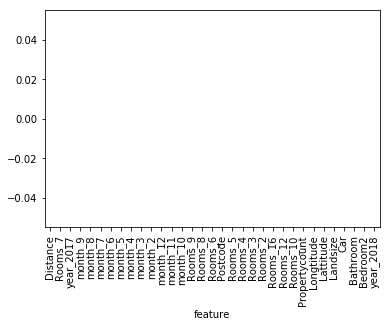

In [84]:
featureImportance = pd.DataFrame({"feature": qw.drop('Price',axis=1).columns, "importance": model_simplelasso.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [85]:
# Проверяем:
print_metrics(y_test,y_pred_lasso)

MAE: 342411.499559601
RMSE: 601717.7634696687
R2: -2.4201138271839895e-05
MAPE: 2.3934613075537556


In [86]:
# Шикарно, продолжаем

In [87]:
# Приступаем к  подбору гиперпараметра для Lasso (Сейчас будет страшно)

In [88]:
from sklearn.grid_search import GridSearchCV


param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

model_lasso = Lasso() 

grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

y_pred_lasso = grid_cv_lasso.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Лучшее значение параметра: {'alpha': 0.001}


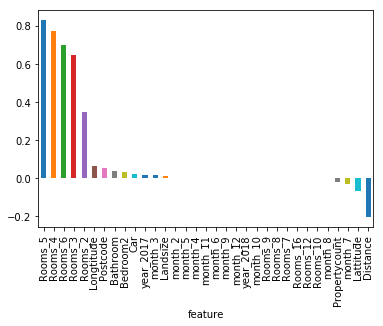

In [89]:
featureImportance = pd.DataFrame({"feature": qw.drop('Price',axis=1).columns, "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar');

In [90]:
print_metrics(y_test,y_pred_lasso)

MAE: 293173.59531155863
RMSE: 497619.0624573535
R2: 0.4149275747463559
MAPE: 1.9903079270641193


In [91]:
print_metrics(y_test,y_pred_naive)

MAE: 342411.4995598398
RMSE: 601717.7634695022
R2: -2.4201138250523613e-05
MAPE: 2.3934613075558597


In [92]:
print_metrics(y_test,y_pred_regr)

MAE: 290361.6905340861
RMSE: 492196.3519831448
R2: 0.4299146840874726
MAPE: 1.9584791541604485


In [93]:
print_metrics(y_test,y_pred_forest)

MAE: 253057.53413924298
RMSE: 457947.17480542883
R2: 0.5415409039278736
MAPE: 1.6514047176080169


In [94]:
# Лес однозначно вне конкуренции ^_^
# Честно говоря для меня эта работа была одновременно сложной и интересной, спасибо большое за помощь
# и отличные объяснения! :D

### Итого
Отличная работа! Много объяснений, шикарная предобработка, разные модели, и корректные метрики, отлично!